In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal, glorot_uniform
from keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler


In [2]:
data_train = pd.read_pickle('Data/train_clean_2.pkl')
data_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
0,0.554222,1.0,0.0,0.000000,0.398189,0.000000,0.190514,0.774141,0.004995,0.666667,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
1,0.521013,0.5,0.0,0.000691,0.299222,0.000649,0.000000,0.827157,0.000668,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
2,0.545612,1.0,0.0,0.000102,0.248790,0.000000,0.571429,0.851531,0.000604,0.000000,...,0.206293,0.022686,0.000562,0.50000,0.116689,0.566809,0.020597,0.020891,1.0,1
3,0.593774,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.559571,0.002227,0.333333,...,0.026009,0.074658,0.003375,1.00000,0.025595,0.097360,0.020597,0.002580,0.0,1
4,0.278900,0.0,0.0,0.000000,0.160199,0.009740,0.134400,0.841197,0.000700,0.833333,...,0.049540,0.064444,0.003375,0.85715,0.032973,0.131737,0.020597,0.002613,1.0,1


In [3]:
data_test = pd.read_pickle('Data/test_clean.pkl')
data_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
0,0.485838,0.5,0.0,0.000623,0.364916,0.000682,0.000000,0.559775,0.000692,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.0,1
1,0.471255,0.5,0.0,0.000000,0.432846,0.001364,0.089721,0.740107,0.002308,0.333333,...,0.026009,0.074658,0.003963,1.0000,0.025595,0.106699,0.020597,0.002580,0.0,1
2,0.619600,0.5,0.0,0.000000,0.208381,0.002046,0.424221,0.668134,0.000857,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.0,1
3,0.600626,1.0,0.0,0.000018,0.146909,0.015007,0.583363,0.858019,0.001088,0.500000,...,0.176415,0.238134,0.005945,0.8077,0.043148,0.250982,0.199603,0.004473,0.0,1
4,0.642833,1.0,0.0,0.000259,0.177191,0.042974,0.583363,0.691851,0.000956,0.750000,...,0.211176,0.106760,0.001321,0.7500,0.122571,0.238861,0.106760,0.005346,0.0,1


In [4]:
data_validation = pd.read_pickle('Data/validation_2.pkl')
data_validation.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218
1000,0.401274,0.5,0.0,0.019095,0.292064,0.009777,0.208375,0.770723,0.006652,0.000000,...,0.50000,0.033228,0.165263,0.007308,1.00000,0.038533,0.127958,0.028083,0.006377,1.0
1001,0.566226,0.5,0.0,0.000232,0.273491,0.000000,0.000000,0.587792,0.003078,0.500000,...,0.75000,0.176846,0.878071,0.001218,0.50000,0.148745,0.222019,0.878071,0.016134,1.0
1002,0.611535,0.5,0.0,0.000000,0.169363,0.019553,0.208375,0.648957,0.000794,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
1003,0.395096,0.5,0.0,0.000000,0.209058,0.008380,0.468750,0.785318,0.010822,0.666667,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
1004,0.453976,0.5,0.0,0.000000,0.374536,0.012570,0.312500,0.672679,0.003177,0.666667,...,0.54545,0.259219,0.127585,0.013398,0.95455,0.064810,0.308742,0.127585,0.008443,1.0


In [5]:
print("Data train shape: ", data_train.shape)
print("Data test shape: ", data_test.shape)
print("Data validation shape: ", data_validation.shape)

Data train shape:  (472422, 219)
Data test shape:  (270955, 219)
Data validation shape:  (1000, 218)


### Data pre processing

In [6]:
X_train = data_train.drop(columns = ['target'])
y_train = data_train['target'] 

In [7]:
X_test = data_test.drop(columns = ['target'])
y_test = data_test['target']

### Data balancing and standardize

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [9]:
X_test = scaler.fit_transform(X_test)

In [10]:
X_val, X_t, y_val, y_t = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

X_train.shape, X_val.shape, X_t.shape, y_train.shape, y_val.shape, y_t.shape

((472422, 218), (135477, 218), (135478, 218), (472422,), (135477,), (135478,))

In [11]:
y_val

10885     1
122065    1
104221    1
222013    1
192297    1
         ..
119879    1
259178    1
131932    0
146867    0
121958    1
Name: target, Length: 135477, dtype: int32

### Data concatenation

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [13]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [14]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_t, y_t))

In [15]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(218,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

### Shuffling and batch data

In [16]:
BATCH_SIZE = 10000
SHUFFLE_BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = test_dataset.batch(BATCH_SIZE)

### Model

In [17]:
modelo = Sequential()

modelo.add(Dense(512, activation = 'relu', kernel_regularizer = l2(0.01), input_shape = (X_train.shape[1],)))
modelo.add(BatchNormalization())
modelo.add(Dense(256, activation = 'relu', kernel_initializer = 'glorot_uniform'))
modelo.add(BatchNormalization())
modelo.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
modelo.add(BatchNormalization())
modelo.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
modelo.add(BatchNormalization())
modelo.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
modelo.add(BatchNormalization())
modelo.add(Dense(16, activation='relu', kernel_initializer='glorot_uniform'))
modelo.add(BatchNormalization())
modelo.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation = 'sigmoid'))




In [18]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               112128    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              5

### Training

In [19]:
from keras.optimizers import Adam, SGD, RMSprop

optimizer = Adam(learning_rate = 0.0001, clipvalue = 100.)

In [20]:
def total_mae_loss(y_true, y_pred):

    total_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    tf.print(y_true, summarize = -1)
    tf.print(y_pred, summarize = 1)
    return total_loss

In [21]:
def brier_score(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [22]:
modelo.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics  = [brier_score, 'accuracy'])

In [23]:
def scheduler(epoch, lr):

    if epoch < 200:

        return 0.001

    elif epoch >= 200 and epoch <= 1000:

        slope = (0.000001 - 0.001) / (1000 - 200)

        intercept = 0.001 - (slope * 200)

        return slope * epoch + intercept

    else:
        return 0.000001 

In [24]:
epochs = 2000

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 500, verbose = 1, restore_best_weights = True)

class_weights = {0: 1, 1: 0.2}

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [25]:
history = modelo.fit(train_dataset, validation_data = val_dataset, epochs = epochs, callbacks = [early_stop], class_weight = class_weights)

Epoch 1/2000
48/48 [==============================] - 5s 53ms/step - loss: 3.1154 - brier_score: 0.2814 - accuracy: 0.5484 - val_loss: 3.3414 - val_brier_score: 0.2433 - val_accuracy: 0.6211
Epoch 2/2000
48/48 [==============================] - 2s 50ms/step - loss: 2.7178 - brier_score: 0.2660 - accuracy: 0.5654 - val_loss: 2.9616 - val_brier_score: 0.2333 - val_accuracy: 0.6828
Epoch 3/2000
48/48 [==============================] - 3s 54ms/step - loss: 2.3701 - brier_score: 0.2574 - accuracy: 0.5758 - val_loss: 2.6295 - val_brier_score: 0.2268 - val_accuracy: 0.6945
Epoch 4/2000
48/48 [==============================] - 2s 51ms/step - loss: 2.0643 - brier_score: 0.2509 - accuracy: 0.5867 - val_loss: 2.3448 - val_brier_score: 0.2247 - val_accuracy: 0.6830
Epoch 5/2000
48/48 [==============================] - 2s 48ms/step - loss: 1.7968 - brier_score: 0.2462 - accuracy: 0.5975 - val_loss: 2.0975 - val_brier_score: 0.2242 - val_accuracy: 0.6712
Epoch 6/2000
48/48 [=========================

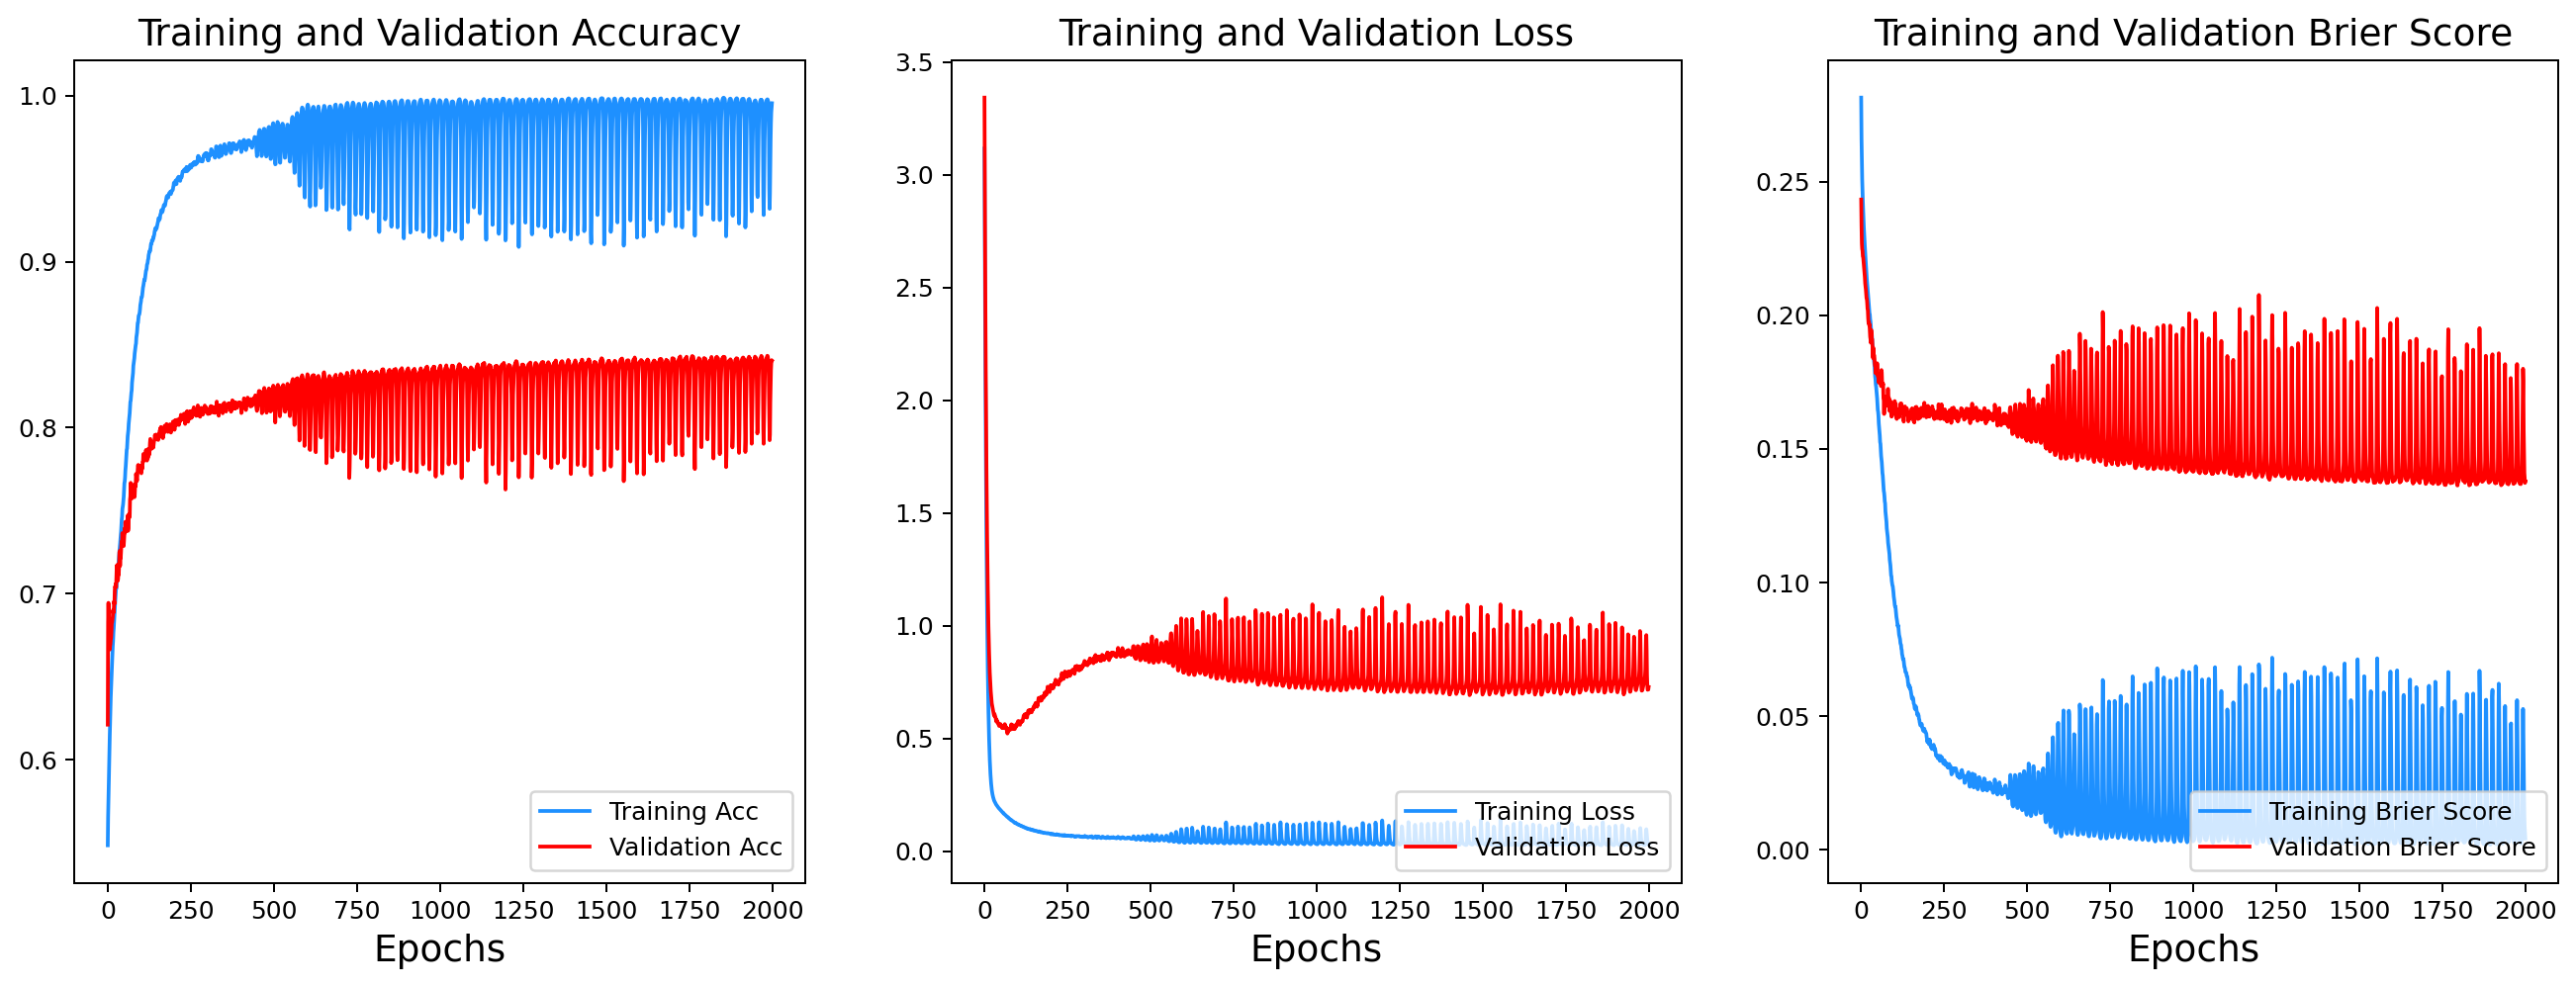

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

brier_score = history.history['brier_score']
val_brier_score = history.history['val_brier_score']

epochs_range = range(2000)

fig, axes = plt.subplots(1, 3, figsize = (18,6), dpi = 180)

axes[0].plot(epochs_range, acc, lw = 1.5, color = 'dodgerblue', label = 'Training Acc')
axes[0].plot(epochs_range, val_acc, lw = 1.5, color = 'red', label = 'Validation Acc')
axes[0].legend(loc = 'lower right')
axes[0].set_xlabel('Epochs', fontsize = 15)
axes[0].set_title('Training and Validation Accuracy', fontsize = 15)


axes[1].plot(epochs_range, loss, lw = 1.5, color = 'dodgerblue', label = 'Training Loss')
axes[1].plot(epochs_range, val_loss, lw = 1.5, color = 'red', label = 'Validation Loss')
axes[1].legend(loc = 'lower right')
axes[1].set_xlabel('Epochs', fontsize = 15)
axes[1].set_title('Training and Validation Loss', fontsize = 15)

axes[2].plot(epochs_range, brier_score, lw = 1.5, color = 'dodgerblue', label = 'Training Brier Score')
axes[2].plot(epochs_range, val_brier_score, lw = 1.5, color = 'red', label = 'Validation Brier Score')
axes[2].legend(loc = 'lower right')
axes[2].set_xlabel('Epochs', fontsize = 15)
axes[2].set_title('Training and Validation Brier Score', fontsize = 15)

plt.show()


In [29]:
test_loss, test_accuracy, test_brier_score = modelo.evaluate(X_test, y_test)

8468/8468 [==============================] - 49s 6ms/step - loss: 0.7294 - brier_score: 0.1381 - accuracy: 0.8401


In [30]:
predicciones = modelo.predict(data_validation)

32/32 [==============================] - 1s 4ms/step


In [ ]:
type(predicciones)

In [31]:
predicciones

array([[9.96541321e-01],
       [9.99993682e-01],
       [9.98136163e-01],
       [6.79243147e-01],
       [9.98380661e-01],
       [1.76252067e-01],
       [5.92211145e-04],
       [9.80219960e-01],
       [9.99891996e-01],
       [9.99165356e-01],
       [1.00000000e+00],
       [9.99974728e-01],
       [9.57332313e-01],
       [9.99908924e-01],
       [9.99995470e-01],
       [9.95582879e-01],
       [3.16214621e-01],
       [9.99661803e-01],
       [1.33730855e-03],
       [1.00000000e+00],
       [9.74644721e-01],
       [1.28289819e-01],
       [7.15385556e-01],
       [9.99832749e-01],
       [9.93869305e-01],
       [9.99994159e-01],
       [9.83327448e-01],
       [2.31968477e-01],
       [1.00000000e+00],
       [8.55975807e-01],
       [9.92949963e-01],
       [9.99999285e-01],
       [2.43108615e-01],
       [9.45121765e-01],
       [9.99574721e-01],
       [9.99999523e-01],
       [3.03950906e-01],
       [9.99983788e-01],
       [6.19482219e-01],
       [2.45986748e-02],


In [32]:
results = pd.DataFrame(predicciones, columns = ['Predictions'])

results.to_csv('predictions_rp_team_sunday.csv')

In [33]:
modelo.save('model_1.h5')

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Supongamos que tenemos las siguientes predicciones y etiquetas verdaderas para el conjunto de test
y_pred_prob = modelo.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
accu = accuracy_score(y_test, y_pred)
print(accu)

8468/8468 [==============================] - 32s 4ms/step
[[ 17491  22715]
 [ 20606 210143]]
0.8401173626616966
